In [83]:
import numpy as np
import random
import math
from numpy.linalg import norm, eig
#plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [82]:
def generate_data(size):
    A = np.zeros((size,size))
    x = np.zeros(size)
    for i in range(size):
        for j in range(size):
            A[i][j] = random.uniform(-100, 100)
        x[i] = random.uniform(-100, 100)
    b = A.dot(x)
    return A, b, x

def f(x):
    global A, b
    return norm(A.dot(x) - b) ** 2
    
def grad_f(x):
    global A, b
    return 2 * (A @ x - b).T @ A

def def_alpha():
    global A
    #собственные значения матрицы 2* A.T @ A
    eigenvalues, _ = eig(2 *A.T @ A)
    return max(eigenvalues)
    
def grad_descent(num_iter=100):
    global x
    f_solution = f(x)
    alpha, beta, eps = def_alpha(), 0.1, 0.001
    H = ((1 - beta) ** 2) / (alpha * (1 + beta) ** 2)
    # в начале градиентного спуска инициализируем значение x какими-нибудь вектором
    cur_x = np.ones(100)
    steps = [[cur_x, f(cur_x)]]
    # итерация цикла -- шаг градиентнго спуска
    while  f(cur_x) - f_solution > eps:
        steps.append([cur_x, f(cur_x)])
        cur_x = cur_x - H * grad_f(cur_x)
    return np.array(steps)

A,b,x = generate_data(100)
steps = grad_descent()
print('x_solution = ', steps[-1][0] , '\n', 'f(x) = %d'%steps[-1][1])

x_solution =  [-82.92325323 -97.97017432  80.50900105   0.63533056  53.31267965
 -95.1447834   58.73174477 -45.53911603  -3.62685474  63.29708705
  15.07247228 -84.65694128 -48.09619275  88.69745882  17.5870659
  57.06397338  91.50815601  31.75949006 -12.50748821 -56.96741335
   1.42147558  95.37758364  58.11030342 -63.62958939  61.10294699
  76.26876738  77.12646566 -16.49996833   7.80779887  14.10308903
   6.78768185 -27.1273322  -42.23888116 -92.97317592 -10.48593813
 -24.41937711  11.1176397  -35.48572946  47.60773628  32.95761104
 -82.8114622  -33.08480024  83.92306473  52.83849457  67.63225853
  61.31057793  13.40873927 -17.3069604  -23.66749621 -47.22500792
 -62.02714819 -98.57379594 -57.17697731  58.03392587  21.8538841
 -20.81953592  70.48343881  37.76279289 -88.88446907  12.74666406
  90.64067161  -1.68299515  81.81430199 -43.21734965  29.92272725
  11.78656299 -76.36416016 -32.5691108   98.53821354  70.69619741
 -91.95797673  44.58909722 -26.6810998   29.95067144  43.3132816

In [60]:
print('count of steps = %d'%steps.shape[0])

count of steps = 1266496


In [70]:
file = open('solution.txt', 'w')
file.write('step \t function value \n')
for i,f in enumerate(steps):
    file.write('%d \t %f \n'%(i, f[1]))

Text(0,0.5,'f(cur_x)')

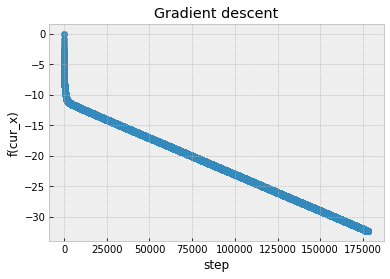

In [84]:
f_solution = f(x)
f_x_0 = f(steps[0][0])
x_axis = [i for i in range(steps.shape[0])]
y_axis = [math.log((f[1] - f_solution)/(f_x_0 - f_solution)) for f in steps]
plt.scatter(x_axis, y_axis)
plt.title('Gradient descent')
plt.xlabel('step')
plt.ylabel('f(cur_x)')